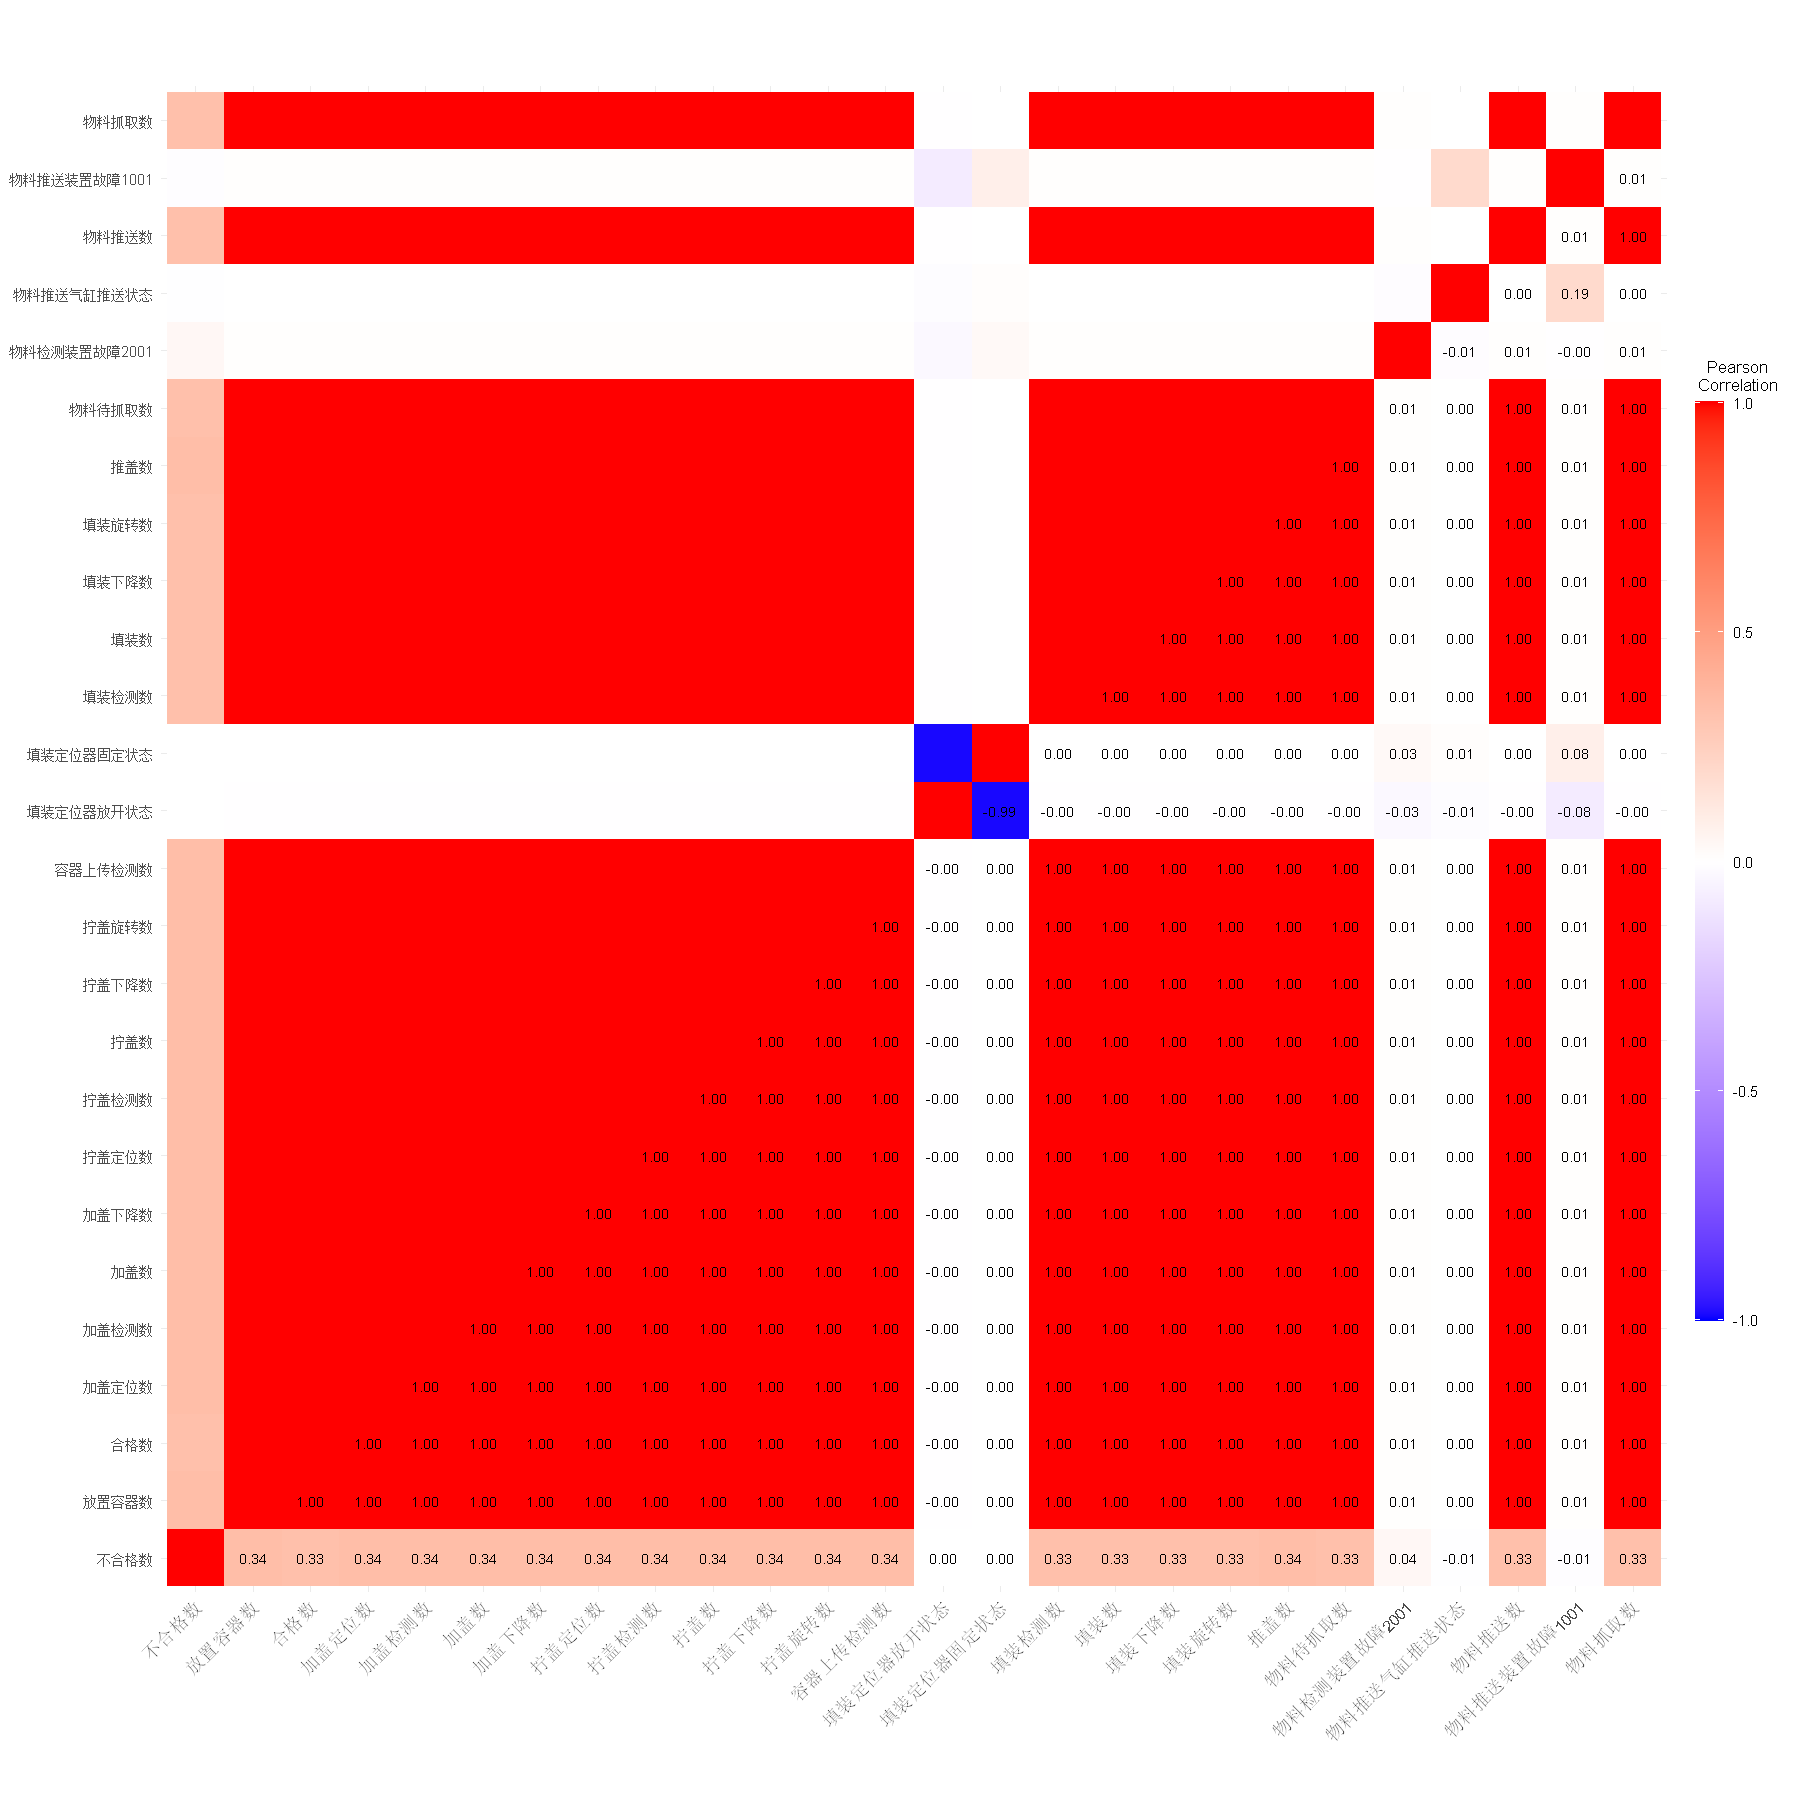

In [20]:
library(ggplot2)
library(reshape2)

data <- read.csv("./Datasets/附件1/M101.csv", header = TRUE, fileEncoding = "UTF-8")

data_numeric <- data[-1][, sapply(data[-1], is.numeric)]

# Calculating the correlation matrix for the selected columns in X
cor_data <- cor(data_numeric[, names(data) %in% names(X)])

# Melt the correlation matrix
cor_melted <- melt(cor_data)

# 将因子转换为字符类型以进行比较
cor_melted$Var1 <- as.character(cor_melted$Var1)
cor_melted$Var2 <- as.character(cor_melted$Var2)
# 将变量列转换为字符类型

# 获取变量的数值索引
var_indices <- as.character(1:ncol(data_numeric))
# 创建一个从1到数值型列数的字符向量，用于后续索引

# 使用数值索引创建一个新列
cor_melted$Var1_Index <- as.numeric(factor(cor_melted$Var1, levels = var_indices))
cor_melted$Var2_Index <- as.numeric(factor(cor_melted$Var2, levels = var_indices))
# 为cor_melted数据集创建新列，包含变量的数值索引

# 生成热力图
ggplot(cor_melted, aes(Var1, Var2, fill = value)) +  # 设置绘图的数据和映射
  geom_tile() +  # 使用瓷砖图层创建热力图
  geom_text(data = subset(cor_melted, Var1 > Var2), 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 3) +  # 在热力图的左下半部分添加数值标签
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +  # 设置颜色渐变
  theme_minimal() +  # 使用简洁主题
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.23, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  guides(fill = guide_colourbar(title.position = "top", title.hjust = 0.5)) +
  coord_fixed()  # 设置固定的坐标比例


# 物料推送装置故障1001相关性分析

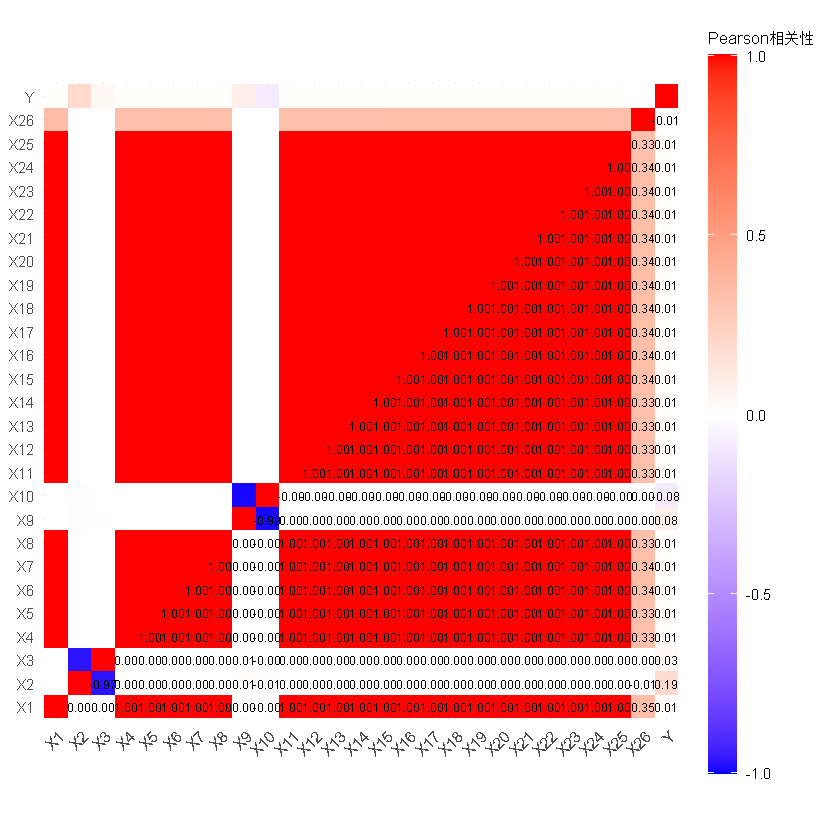

In [5]:
library(ggplot2)
library(reshape2)
library(scales) 
# 假设数据已经加载
data <- read.csv("./Datasets/附件1/M101.csv", header = TRUE, fileEncoding = "UTF-8")

# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))

# 将Y转换为二元因子（0或1）
data$物料推送装置故障1001 <- as.numeric(data$物料推送装置故障1001 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$物料推送装置故障1001

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  #geom_tile(color = "black", size = 0.1) + 加黑色边框
geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)


# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/物料推送装置故障1001相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)


# 物料检测装置故障2001

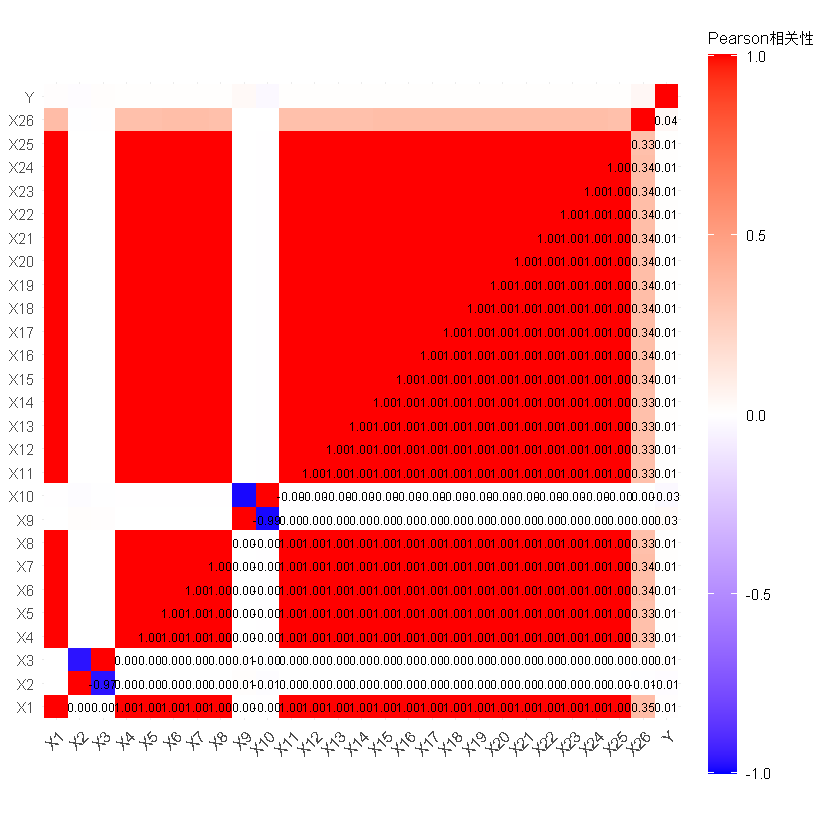

In [6]:
# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))
# 将Y转换为二元因子（0或1）
data$物料检测装置故障2001 <- as.numeric(data$物料检测装置故障2001 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$物料检测装置故障2001

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)

# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/物料检测装置故障2001相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)


# 填装装置检测故障4001

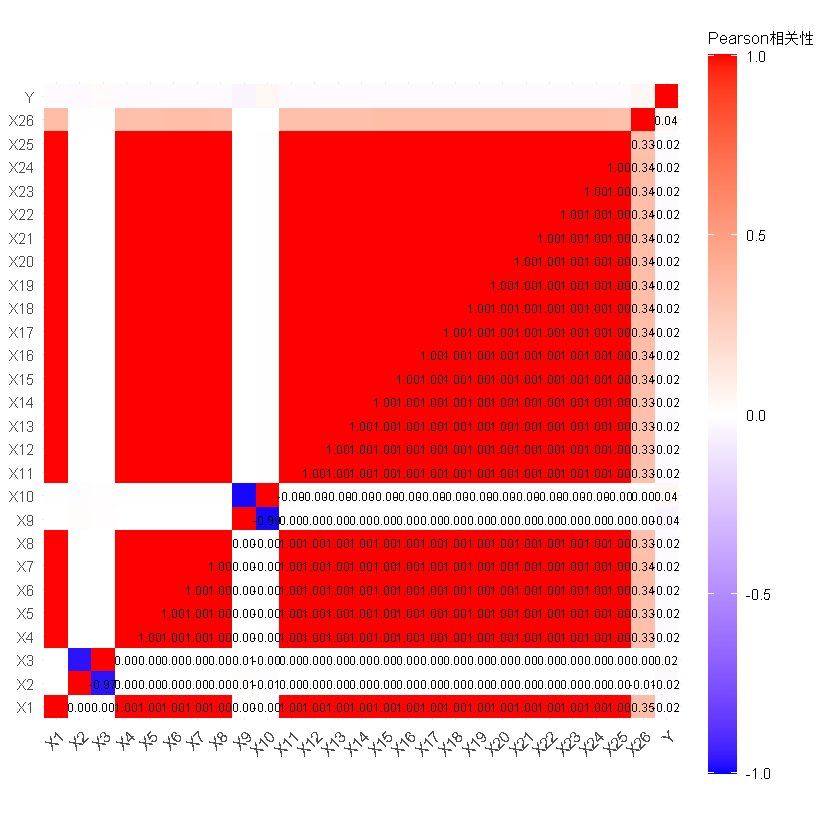

In [7]:
# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))
# 将Y转换为二元因子（0或1）
data$填装装置检测故障4001 <- as.numeric(data$填装装置检测故障4001 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$填装装置检测故障4001

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)

# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/填装装置检测故障4001相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)


# 填装装置定位故障4002

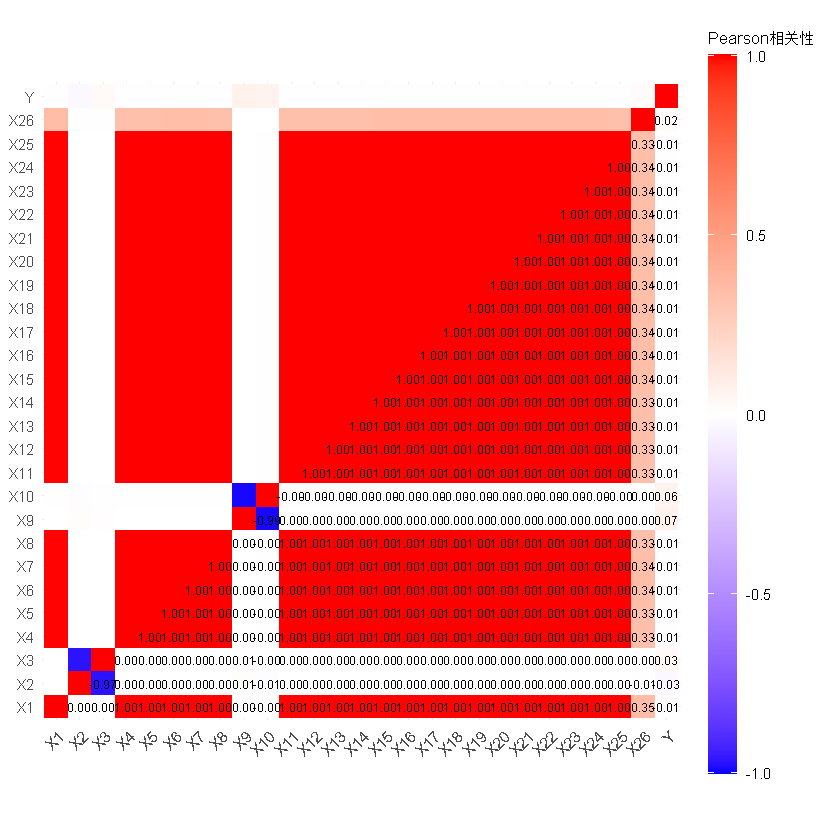

In [8]:
# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))
# 将Y转换为二元因子（0或1）
data$填装装置定位故障4002 <- as.numeric(data$填装装置定位故障4002 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$填装装置定位故障4002

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)

# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/填装装置定位故障4002相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)


# 填装装置填装故障4003

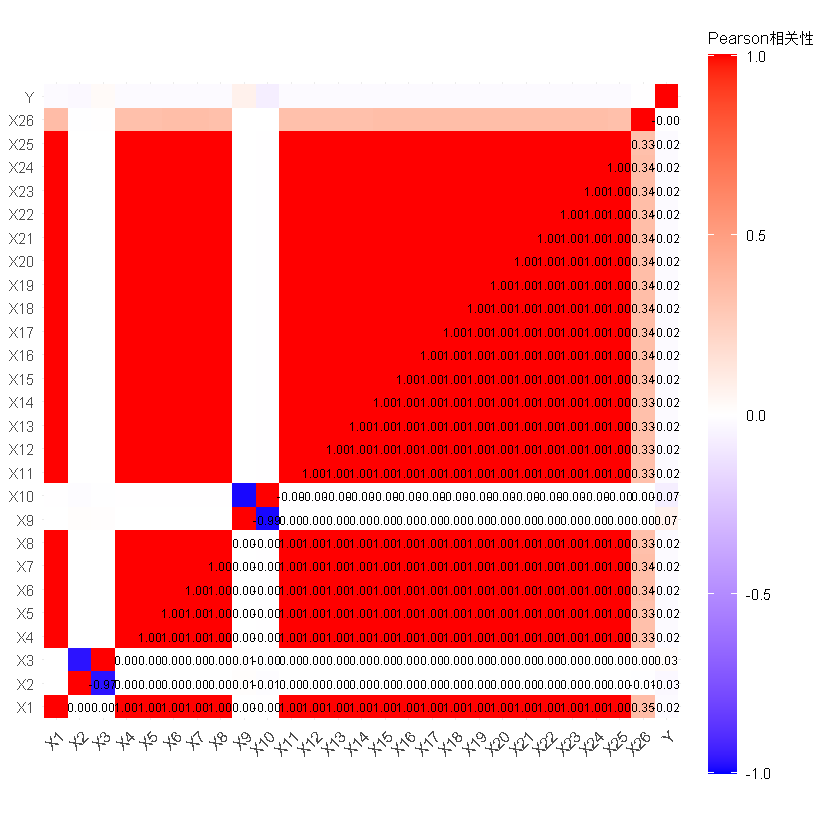

In [9]:
# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))
# 将Y转换为二元因子（0或1）
data$填装装置填装故障4003 <- as.numeric(data$填装装置填装故障4003 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$填装装置填装故障4003

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)

# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/填装装置填装故障4003相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)


# 加盖装置定位故障5001

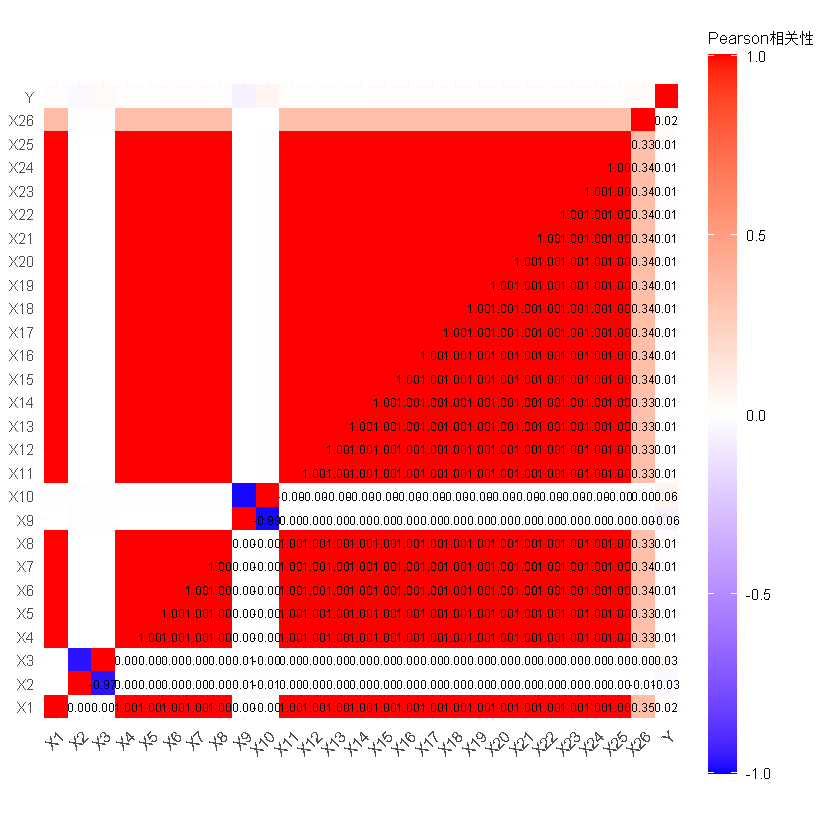

In [10]:
# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))
# 将Y转换为二元因子（0或1）
data$加盖装置定位故障5001 <- as.numeric(data$加盖装置定位故障5001 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$加盖装置定位故障5001

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)

# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/加盖装置定位故障5001相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)


# 加盖装置加盖故障5002

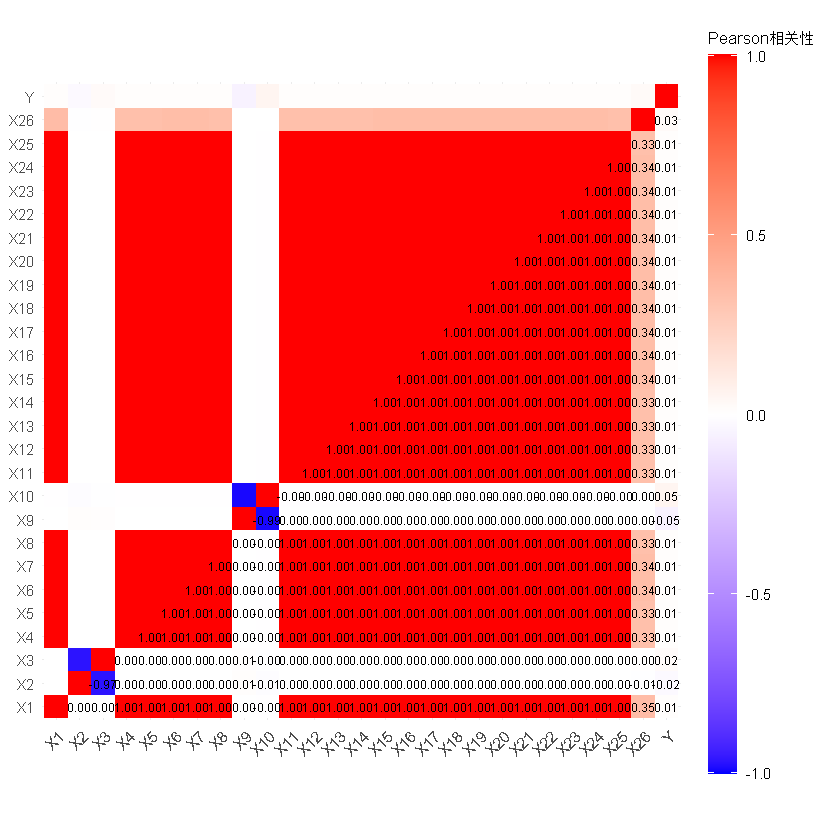

In [11]:
# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))
# 将Y转换为二元因子（0或1）
data$加盖装置加盖故障5002 <- as.numeric(data$加盖装置加盖故障5002 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$加盖装置加盖故障5002

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)

# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/加盖装置加盖故障5002相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)


# 拧盖装置定位故障6001

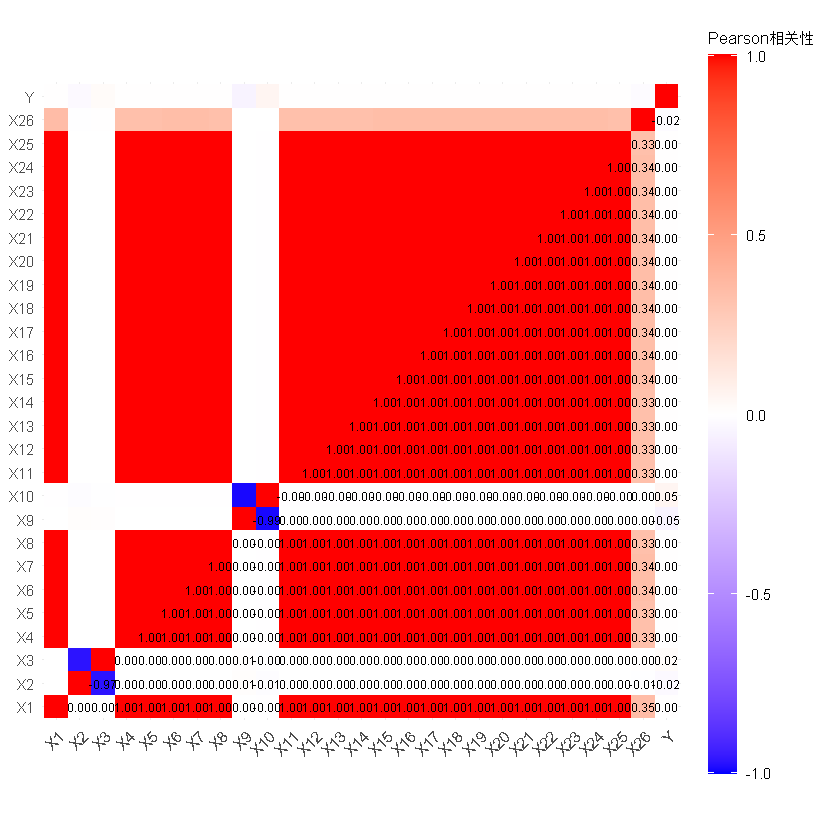

In [12]:
# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))
# 将Y转换为二元因子（0或1）
data$拧盖装置定位故障6001 <- as.numeric(data$拧盖装置定位故障6001 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$拧盖装置定位故障6001

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)

# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/拧盖装置定位故障6001相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)


# 拧盖装置拧盖故障6002

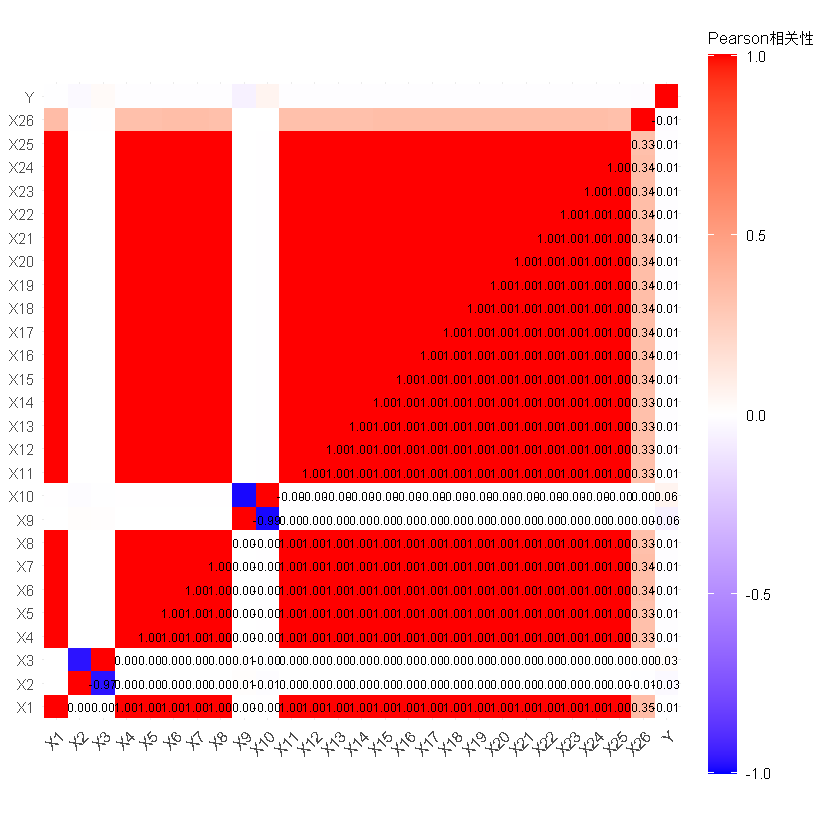

In [13]:
# 选择特定的列作为X，并将它们重命名为X1, X2, ..., Xn
X_columns <- c('时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
               '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
               '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
               '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数')
X <- data[X_columns]
colnames(X) <- paste0("X", 1:ncol(X))
# 将Y转换为二元因子（0或1）
data$拧盖装置拧盖故障6002 <- as.numeric(data$拧盖装置拧盖故障6002 != 0)

# 将Y作为最后一列加入X中，用于计算相关性
X$Y <- data$拧盖装置拧盖故障6002

# 计算相关性矩阵
cor_matrix <- cor(X)

# 将相关性矩阵转换为长格式
cor_melted <- melt(cor_matrix)

# 调整因子级别以升序排列X
cor_melted$Var1 <- factor(cor_melted$Var1, levels = colnames(X)) # Y轴使用升序
cor_melted$Var2 <- factor(cor_melted$Var2, levels = colnames(X)) # X轴也使用升序

# 筛选下三角矩阵
cor_melted_lower_triangle <- subset(cor_melted, as.numeric(Var1) < as.numeric(Var2))


# 生成仅对下三角矩阵进行文本注释的热图
heatmap_plot <- ggplot(cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  geom_text(data = cor_melted_lower_triangle, 
            aes(label = sprintf("%.2f", value)), 
            color = "black", size = 2.5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson相关性") +
  theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "right", # 确保图例位于右侧
        legend.key.height = unit(0.18, "npc"), # 调整图例键的高度以匹配图表高度
        legend.title = element_text(size = 10)) + # 如有必要，调整图例标题的大小
  coord_fixed()

# 显示热图
print(heatmap_plot)

# 将热图保存为图像文件
ggsave("./Models_可视化/相关性可视化/拧盖装置拧盖故障6002相关性分析热力图.png", plot = heatmap_plot, width = 10, height = 8, dpi = 300)
